Dataset : https://www.kaggle.com/c/fake-news/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
#Getting the independent features

x = df.iloc[:,:-1]

In [5]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
#Getting the independent feature

y = df.iloc[:,-1]

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,20800.0,10399.500000,6004.587135,0.0,5199.75,10399.5,15599.25,20799.0
label,20800.0,0.500625,0.500012,0.0,0.00,1.0,1.00,1.0


In [10]:
#Checking for null values
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
#Checking for Categorical Features
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('The categorical features are : {}'.format(categorical_features))

The categorical features are : ['title', 'author', 'text']


In [12]:
#Checking for Numerical Features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('The numerical features are {} : '.format(numerical_features))

The numerical features are ['id', 'label'] : 


In [13]:
df.shape

(20800, 5)

In [14]:
#CountVectorizer is nothing but Bag Of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [15]:
#Dropping nan values
df=df.dropna()

In [19]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [16]:
#Making a copy of processed dataset
messages = df.copy()

In [17]:
#Resetting the indexes because after dropping the the null values the some of the indexes might get dropped
messages.reset_index(inplace=True)

In [20]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [21]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

# Text preprocessing removing the stopwords

In [30]:
%%time
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []

for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word)  for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

CPU times: user 25.1 s, sys: 1.9 s, total: 27 s
Wall time: 27 s


In [32]:
#Applying CountVectorizer
#Creating the Bag Of Words model

from sklearn.feature_extraction.text import CountVectorizer

# max_feature means from all the words take most 5000 occuring words 

# ngram_range is nothing but it take 1 word 2 word 3 word as a feature and then it will basically apply Bag Of Words

cv = CountVectorizer(max_features=5000, ngram_range=(1, 3))
x = cv.fit_transform(corpus).toarray()

In [33]:
#Now we have 5000 features
x.shape

(18285, 5000)

In [34]:
y = messages['label']

# Splitting the data into train test split

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=0)

In [39]:
# Here because of ngram_range as we passed (1,3) we are getting combination of 1 to 3 words
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [41]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [42]:
count_df = pd.DataFrame(x_train, columns=cv.get_feature_names())

In [43]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# Applying MultinomialNB Algorithm

- MultinomialNB algorithm works well on text data & it is also supported for multiple categories of output

In [47]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import itertools

In [49]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)

In [51]:
score = accuracy_score(y_test, pred)
print("The Accuracy Score is : {}".format(score))

The Accuracy Score is : 0.9019055509527755


Confusion matrix, without normalization


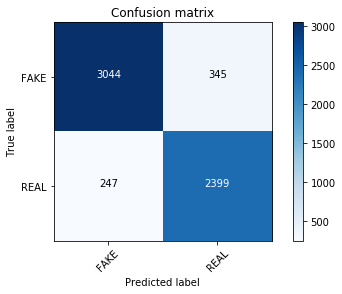

In [55]:
conf_mat = confusion_matrix(y_test, pred)
plot_confusion_matrix(conf_mat, classes=['FAKE', 'REAL'])

# Applying Passive Agressive Algorithm

- Applying Passive Agressive algorithm also works well on text data

In [56]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [57]:
pac = PassiveAggressiveClassifier(n_iter=50)

In [60]:
pac.fit(x_train, y_train)
pred = pac.predict(x_test)

In [61]:
score = accuracy_score(y_test, pred)
print("The Accuracy Score is : {}".format(score))

The Accuracy Score is : 0.9186412593206297


Confusion matrix, without normalization


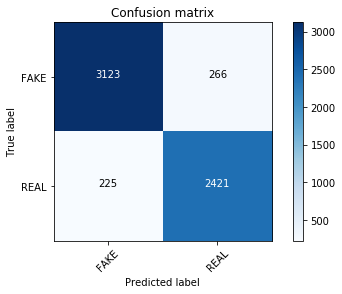

In [62]:
conf_mat = confusion_matrix(y_test, pred)
plot_confusion_matrix(conf_mat, classes=['FAKE', 'REAL'])

#  MultinomialNB Hyperparameter Tuning

In [63]:
classifier = MultinomialNB(alpha=0.1)

In [68]:
previous_score = 0

# We are taking values from 0 to 1 with an increament of 0.1 

for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train, y_train)
    y_pred = sub_classifier.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    if score> previous_score:
        classifier = sub_classifier
        print("Alpha is : {} & Accuracy is : {}".format(alpha, score))

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha is : 0.0 & Accuracy is : 0.8903065451532726
Alpha is : 0.1 & Accuracy is : 0.9020712510356255
Alpha is : 0.2 & Accuracy is : 0.9025683512841757
Alpha is : 0.30000000000000004 & Accuracy is : 0.9024026512013256
Alpha is : 0.4 & Accuracy is : 0.9017398508699255
Alpha is : 0.5 & Accuracy is : 0.9015741507870754
Alpha is : 0.6000000000000001 & Accuracy is : 0.9022369511184756
Alpha is : 0.7000000000000001 & Accuracy is : 0.9025683512841757
Alpha is : 0.8 & Accuracy is : 0.9015741507870754
Alpha is : 0.9 & Accuracy is : 0.9017398508699255


In [69]:
#Get feature names
feature_names = cv.get_feature_names()

In [70]:
# The most negative value is the most FAKEST WORD

classifier.coef_[0]

array([ -9.10038883,  -8.62276128,  -9.10038883, ..., -10.79498456,
        -8.91467169,  -9.32864749])

In [71]:
# Most REAL WORDS

sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.000149156604985, 'trump'),
 (-4.287872694443541, 'hillari'),
 (-4.396389621061519, 'clinton'),
 (-4.899969726208735, 'elect'),
 (-5.176598600897756, 'new'),
 (-5.234730366348767, 'comment'),
 (-5.273968180973631, 'video'),
 (-5.3868167681180115, 'war'),
 (-5.396821854078974, 'us'),
 (-5.412019714988405, 'hillari clinton'),
 (-5.417137433425386, 'fbi'),
 (-5.48068448454208, 'vote'),
 (-5.566255475855405, 'email'),
 (-5.578238842742501, 'world'),
 (-5.634015380199913, 'obama'),
 (-5.734501455772904, 'donald'),
 (-5.763095255139644, 'donald trump'),
 (-5.785090276725191, 'russia'),
 (-5.846224665218559, 'day'),
 (-5.862110622807369, 'america')]

In [73]:
# Most FAKEST WORDS

sorted(zip(classifier.coef_[0], feature_names), reverse=False)[:20]

[(-10.794984555596727, 'abe'),
 (-10.794984555596727, 'abroad'),
 (-10.794984555596727, 'abus new'),
 (-10.794984555596727, 'abus new york'),
 (-10.794984555596727, 'act new'),
 (-10.794984555596727, 'act new york'),
 (-10.794984555596727, 'advic'),
 (-10.794984555596727, 'advis new'),
 (-10.794984555596727, 'advis new york'),
 (-10.794984555596727, 'age new'),
 (-10.794984555596727, 'age new york'),
 (-10.794984555596727, 'agenda breitbart'),
 (-10.794984555596727, 'ail'),
 (-10.794984555596727, 'aleppo new'),
 (-10.794984555596727, 'aleppo new york'),
 (-10.794984555596727, 'ali'),
 (-10.794984555596727, 'america breitbart'),
 (-10.794984555596727, 'america new york'),
 (-10.794984555596727, 'american breitbart'),
 (-10.794984555596727, 'american new')]